# 🏁 Módulo 4 – Preguntas de Negocio

**Objetivo del módulo**  
Aplicar todo lo aprendido (limpieza, EDA, visualización, agrupaciones) para **responder preguntas de negocio reales** con Python y Pandas.

**¿Por qué es importante?**  
Un analista de datos no solo organiza tablas: transforma datos en **insights accionables** que guían decisiones de producto, marketing o estrategia. Saber plantear y contestar preguntas concretas demuestra el valor práctico de tus habilidades técnicas.

---

En este notebook resolverás **20 preguntas** usando el dataset limpio `salarios_pais.csv`.  
Cada pregunta viene acompañada de una celda *Markdown* (enunciado) y su celda de código con la solución.



---
## 0 · Setup
Cargamos librerías y configuramos Seaborn para que los gráficos se vean con un estilo agradable.


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from cursos.analisis_datos.utils.paths import DATA_PROCESSED_DIR
pd.set_option('display.float_format', lambda x: '%.2f' % x)
path_salarios_pais = DATA_PROCESSED_DIR / "salarios_pais.csv"
path_salarios_pais = str(path_salarios_pais)
print(f"Ruta del archivo salarios_pais: {path_salarios_pais}")
print(f"existe archivo salarios_pais: {Path(path_salarios_pais).exists()}")
df_salarios_pais = pd.read_csv(filepath_or_buffer=path_salarios_pais, sep=',', encoding='utf-8')
df_salarios_pais.head()


Ruta del archivo salarios_pais: C:\Users\fvoac\OneDrive\python\pydatapanama-cursos\cursos\analisis_datos\data\processed\salarios_pais.csv
existe archivo salarios_pais: True


,nombre,apellido,edad,pais,educacion_universitaria,nombre_de_la_empresa,cargo,anos_en_la_empresa,sueldo_anual_dolares,bono_anual_euros,bono_anual_dolares,capital,cantidad_de_habitantes,PIB,ingreso_per_capita,compensacion_total,senioridad
0,José,López,36,Chile,Sí,Mercado Libre,Python Developer,2,71841.00,4981.00,5479.10,Santiago,19116209.00,317000000000.00,16580.00,77320.10,Junior
1,Fernanda,Vargas,39,Chile,Sí,Amazon,AI Software Engineer,2,142115.00,1252.00,1377.20,Santiago,19116209.00,317000000000.00,16580.00,143492.20,Junior
2,Fernanda,Ramírez,30,Colombia,No,Facebook,Machine Learning Engineer,2,92278.00,5262.00,5788.20,Bogotá,51874024.00,343000000000.00,6611.00,98066.20,Junior
3,José,Gómez,35,Chile,Sí,Mercado Libre,Python Developer,12,97130.00,3671.00,4038.10,Santiago,19116209.00,317000000000.00,16580.00,101168.10,Senior
4,Ana,Pérez,32,Panamá,No,Amazon,Project Manager,2,61413.00,10190.00,11209.00,Ciudad de Panamá,4468000.00,76000000000.00,16995.00,72622.00,Junior


## 1️⃣ Pregunta  
**¿Cuál es la compensación total promedio en el dataset?**

### ¿Por qué importa?  
La media salarial brinda una referencia rápida para entender el nivel general de pago en la organización o sector. Permite comparar con benchmarks externos y detectar si la empresa está ofreciendo compensaciones competitivas.

### Pista  
La respuesta está a un solo método de distancia sobre la columna `compensacion_total`.

In [5]:
# Calcula la compensación total promedio
# promedio en estadística es mean
print(f'Promedio salarial de la empresa: ${df_salarios_pais['compensacion_total'].mean():.2f} USD')

Promedio salarial de la empresa: $94583.37 USD


## 2️⃣ Pregunta  
**¿Quiénes son los 5 empleados con la compensación total más alta?**

### ¿Por qué importa?  
Identificar a los empleados mejor pagados ayuda a:  
- Detectar roles o perfiles críticos con alto valor de mercado.  
- Verificar consistencia salarial interna y posibles brechas injustificadas.  
- Analizar si los niveles de compensación se alinean con la estrategia de retención de talento.

### Pista   
Ordena la columna `compensacion_total` de forma descendente y toma solo las primeras 5 filas.

In [20]:
# Top 5 empleados con mayor compensación total
# extraer los 5 mas altos en la comumna compensacion total
print(f'5 trabajadores con mayor compensacion en la region')
maximoSalario = df_salarios_pais.nlargest(5, 'compensacion_total')
maximoSalario[['nombre', 'apellido','pais','sueldo_anual_dolares','cargo']]

5 trabajadores con mayor compensacion en la region


,nombre,apellido,pais,sueldo_anual_dolares,cargo
94,Luis,Rodríguez,Colombia,155281.0,AI Software Engineer
162,Ana,Morales,México,155005.0,AI Software Engineer
7,Pedro,Herrera,México,152001.0,AI Software Engineer
143,Luis,Herrera,Costa Rica,153058.0,AI Software Engineer
86,Lucía,Flores,Argentina,151380.0,AI Software Engineer


## 3️⃣ Pregunta  
**¿Qué país registra la compensación total promedio más alta?**

### ¿Por qué importa?  
Conocer el país donde los salarios son más altos permite:  
- Evaluar mercados laborales competitivos y su impacto en costes de contratación.  
- Diseñar políticas de compensación diferenciadas por región.  
- Detectar posibles desalineamientos con el costo de vida o la estrategia global de la empresa.

### Pista  
Agrupa por `pais`, calcula el promedio de `compensacion_total` y ordena de mayor a menor.

In [ ]:
# País con la compensación promedio más alta
promedio_por_pais = df_salarios_pais.groupby(['pais'])['compensacion_total'].mean().sort_values(ascending=False)
print(f'País en la región con promedio de sueldo más alto, indistintamente de senioridad: {promedio_por_pais.head(1).index[0]}')

#interesante
#podemos hacer un grafico por pais y por cargo?

País en la región con promedio de sueldo más alto, indistintamente de senioridad: Colombia


## 4️⃣ Pregunta  
**¿Cómo se distribuye la compensación total según el nivel de senioridad?**  
*(Visualiza la comparación con un boxplot).*

### ¿Por qué importa?  
- Revela si existen diferencias salariales significativas entre Juniors y Seniors.  
- Permite detectar outliers (pagos extremadamente altos o bajos) por nivel.  
- Ayuda a planificar escalas de compensación equitativas y competitivas.

### Pista  
Usa `sns.boxplot()` con `x='senioridad'` y `y='compensacion_total'`.

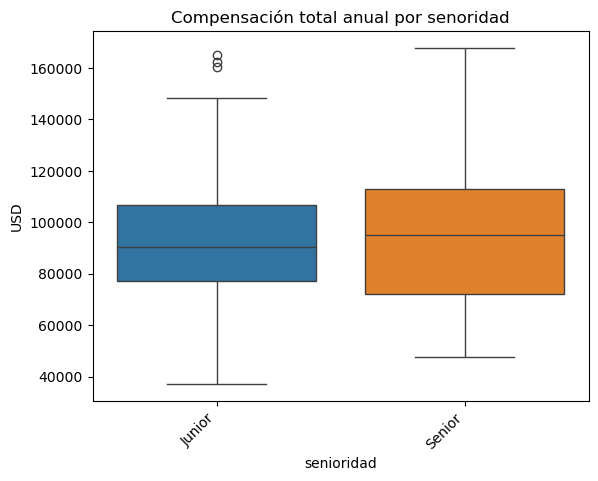

In [ ]:
# Boxplot de compensación total por nivel de senioridad
sns.boxplot(df_salarios_pais,x='senioridad', y='compensacion_total', hue='senioridad')
# adornos
plt.xticks(rotation=45, ha='right')
plt.title('Compensación total anual por senoridad')
plt.ylabel('USD')
plt.show()

# interesante
# el salario más bajo de juniors es mayor al más bajo de senior.
# hay 3 juniors que ganan más que los seniors.
# podemos sacar un boxplot por pais? (relacionado con la pregunta anterior)

## 5️⃣ Pregunta  
**¿Existe correlación entre los años en la empresa y la compensación total?**

### ¿Por qué importa?  
- Permite evaluar si la antigüedad impacta directamente en el salario.  
- Ayuda a validar políticas de incremento por permanencia.  
- Detectar una baja correlación podría indicar que la compensación está más ligada a desempeño o rol que a tiempo en la organización.

### Pista  
Calcula el coeficiente de correlación de Pearson entre `anos_en_la_empresa` y `compensacion_total`.

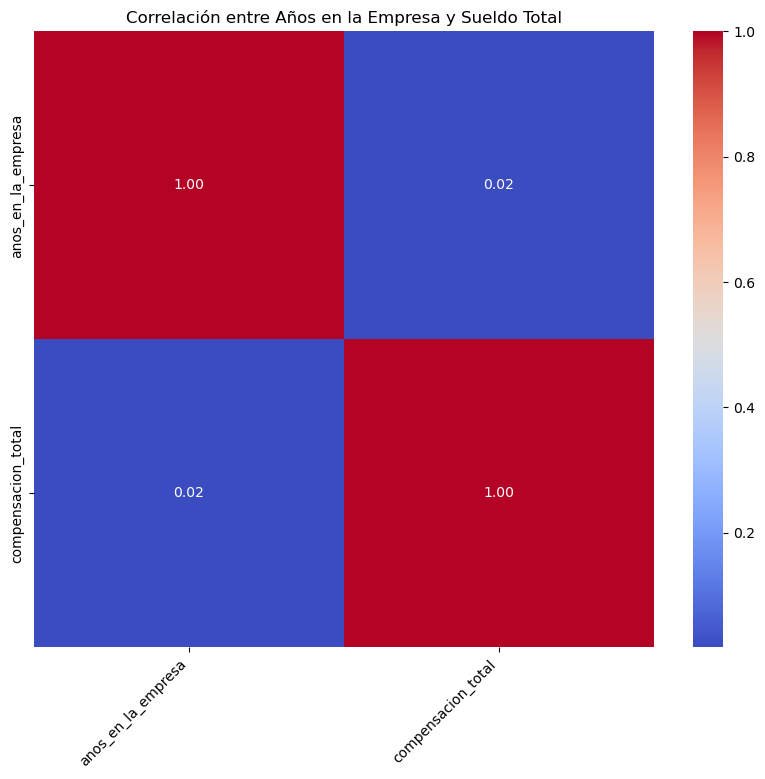

In [6]:
# Correlación entre antigüedad y compensación total
# extraer columnas 
num_cols = df_salarios_pais[['anos_en_la_empresa','compensacion_total']]

corr_matrix = num_cols.corr(method='pearson')
# definir canva
plt.figure(figsize=(10,8))
# crear gráfico
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# adorno
plt.title('Correlación entre Años en la Empresa y Sueldo Total')
plt.xticks(rotation=45, ha='right')
plt.show()

# Interesante
# existe una baja correlación entre sueldo y años de empleo.

## 6️⃣ Pregunta  
**¿Qué cargo presenta la mediana de compensación total más alta?**

### ¿Por qué importa?  
- La mediana es robusta frente a outliers; refleja el salario “típico” para cada rol.  
- Ayuda a identificar posiciones clave con mayor valor de mercado o responsabilidad.  
- Informa decisiones de contratación y alineación salarial interna.

### Pista  
Agrupa por `cargo`, calcula la **mediana** de `compensacion_total`, ordena en orden descendente y observa el primer resultado.

In [109]:
# Cargo con la mediana de compensación total más alta
cargo = df_salarios_pais.groupby('cargo')['compensacion_total'].median().sort_values(ascending=False).head(1).index[0]
print(f'Cargo en la región con el sueldo total más alto según la mediana: {cargo}')


Cargo en la región con el sueldo total más alto según la mediana: AI Software Engineer


## 7️⃣ Pregunta  
**¿Cómo es la distribución de los bonos anuales en dólares?**  
*(Construye un histograma e incluye la curva KDE para visualizar la densidad).*

### ¿Por qué importa?  
- Ayuda a ver si los bonos están concentrados en un rango específico o tienen una cola larga.  
- Detecta outliers que podrían distorsionar el promedio.  
- Facilita comparar políticas de incentivos entre departamentos o países.

### Pista  
Usa `sns.histplot()` sobre la columna `bono_anual_dolares`, pon `bins=30` y `kde=True`.

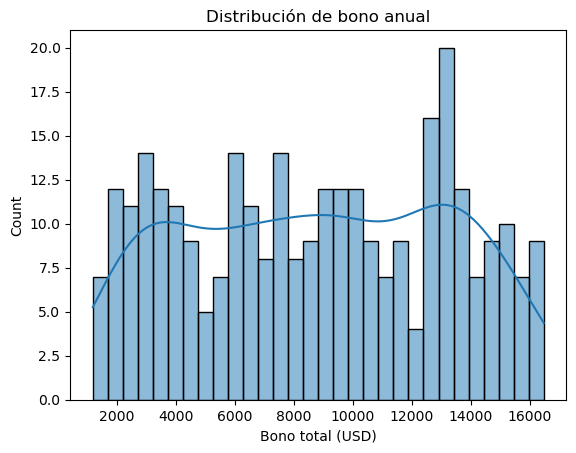

In [7]:
# Histograma y KDE de los bonos anuales en USD
sns.histplot(data=df_salarios_pais,x='bono_anual_dolares',bins=30,kde=True)
#adornos
plt.title('Distribución de bono anual')
plt.xlabel('Bono total (USD)')
plt.show()

#Interesante
#Según la curva KDE, la distribución es bastante igualitaria (plana), con excepcion de los extremos
#Según el histograma podemos identificar tres rangos de bono
#Investigar como ver esto por senioridad y pais

## 8️⃣ Pregunta  
**¿Qué proporción de empleados proviene de cada país?**  
*(Visualiza el resultado en un barplot).*

### ¿Por qué importa?  
- Mide la **representatividad geográfica** de la fuerza laboral.  
- Ayuda a detectar concentración en un país y oportunidades de diversificación.  
- Sirve como referencia para ajustar políticas de compensación y beneficio regional.

### Pista  
Calcula `value_counts(normalize=True)` sobre la columna `pais`, multiplícalo por 100 para obtener porcentajes y grafícalo con `plot(kind='bar')`.

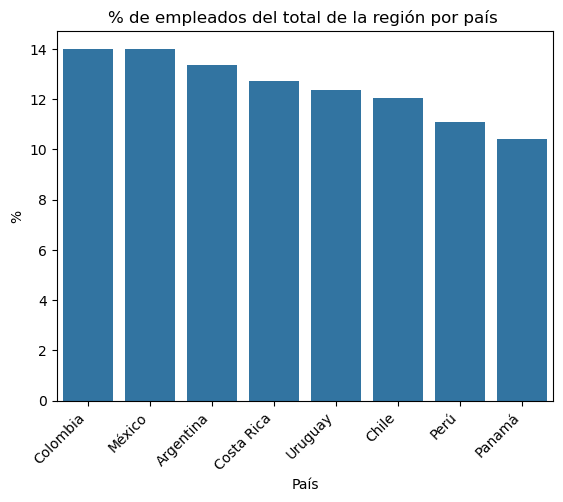

In [113]:
# Proporción de empleados por país (en %)
# en este pregunta puedo utilizar tres métodos para generar el gráfico
# 1. la funcion plot del dataframe 
# df_salarios_pais.pais.value_counts(normalize=True).multiply(100).plot(kind='bar',ylabel='% empleados totales de la región')
# 2. sns countplot.  Solo que esto no se puede normalizar facilmente
# sns.countplot(x='pais', data=df_salarios_pais)
# 3. usando sns barplot
sns.barplot(x=df_salarios_pais.pais.value_counts().index,y=df_salarios_pais.pais.value_counts(normalize=True).multiply(100))
# adornos
plt.xticks(rotation=45, ha='right')
plt.title('% de empleados del total de la región por país ')
plt.ylabel('%')
plt.xlabel('País')
plt.show()

## 9️⃣ Pregunta  
**¿Cuál es el bono anual máximo registrado para cada cargo?**

### ¿Por qué importa?  
- Revela el techo de incentivos para cada rol.  
- Permite verificar si ciertos cargos reciben bonos excepcionalmente altos (posibles outliers o políticas de bonificación agresivas).  
- Ayuda a diseñar esquemas de reconocimiento competitivos y equitativos.

### Pista  
Agrupa por `cargo`, aplica `max()` a `bono_anual_dolares` y ordena el resultado de mayor a menor.

In [120]:
# Bono anual máximo por cargo
print(f'Bono anual máximo por cargo')
df_salarios_pais.groupby('cargo').bono_anual_dolares.max()

Bono anual máximo por cargo


cargo
AI Software Engineer         16150.2
Data Analyst                 15991.8
Data Engineer                16457.1
Data Scientist               16406.5
Machine Learning Engineer    14022.8
Product Owner                15796.0
Project Manager              16079.8
Python Developer             16476.9
Software Engineer            16039.1
Name: bono_anual_dolares, dtype: float64

## 🔟 Pregunta  
**¿Cuáles son los 3 países con más empleados que ocupan el cargo de *Data Scientist*?**

### ¿Por qué importa?  
- Indica dónde se concentra el talento de ciencia de datos en la organización.  
- Ayuda a orientar iniciativas de reclutamiento, formación y comunidades locales.  
- Puede revelar hubs de innovación o brechas regionales en ese perfil tan demandado.

### Pista  
Filtra el DataFrame por `cargo == "Data Scientist"` y aplica `value_counts()` sobre la columna `pais`, luego utiliza `.head(3)`.

In [8]:
# Top 3 países con más Data Scientists
# puedo utilizar dos metodos
# filtra dataframe directo y contar por pais
#df_salarios_pais[df_salarios_pais['cargo'] == 'Data Scientist'].value_counts('pais').head(3)
# usar funcion query del df
print(f'Top 3 paises con más Data Scientists')
df_salarios_pais.query('cargo == "Data Scientist"').value_counts('pais').head(3)


Top 3 paises con más Data Scientists


pais
Perú         7
Argentina    6
Uruguay      6
Name: count, dtype: int64

## 1️⃣1️⃣ Pregunta  
**¿Cómo se relacionan entre sí las variables numéricas del dataset?**  
*(Construye una matriz de correlación y preséntala en un heatmap).*

### ¿Por qué importa?  
- Detecta **relaciones lineales fuertes** (positivas o negativas) entre variables.  
- Ayuda a identificar **multicolinealidad** antes de crear modelos predictivos.  
- Destaca patrones inesperados que merecen análisis más profundo.

### Pista  
Selecciona solo las columnas numéricas (`select_dtypes('number')`), calcula `corr()` y grafica con `sns.heatmap(annot=True, cmap='coolwarm')`.

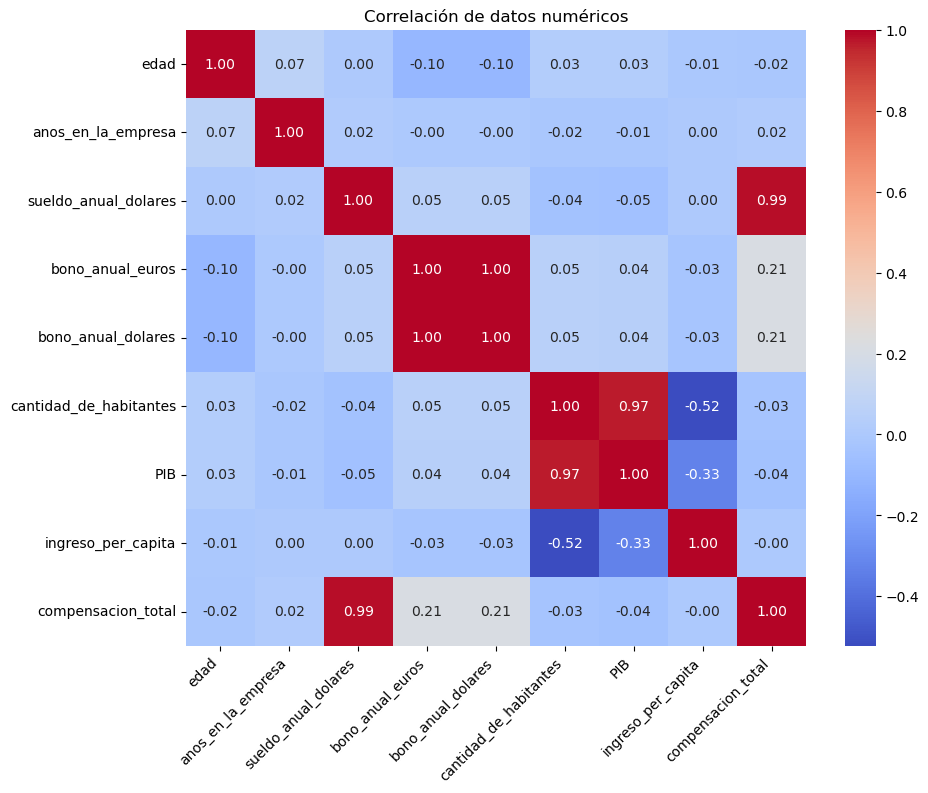

In [9]:
# Matriz de correlación numérica con heatmap
num_cols = df_salarios_pais.select_dtypes(include='number')
# definir matriz de correlacion
corr_matrix=num_cols.corr()
# definir canva
plt.figure(figsize=(10,8))
# crear gráfico
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# adornos
plt.title('Correlación de datos numéricos')
plt.xticks(rotation=45, ha='right')
plt.show()


## 1️⃣2️⃣ Pregunta  
**¿Qué porcentaje de empleados del dataset tiene educación universitaria?**

### ¿Por qué importa?**  
- Mide el nivel de formación académica dentro de la organización.  
- Sirve de referencia para programas de capacitación, becas y desarrollo profesional.  
- Permite contrastar la brecha (si existe) entre compensación y formación.

### Pista
Usa `value_counts(normalize=True)` en la columna `educacion_universitaria`, luego multiplica por 100 para obtener el porcentaje.

In [37]:
# Porcentaje de empleados con y sin educación universitaria
empleados = df_salarios_pais.value_counts(df_salarios_pais['educacion_universitaria'] == 'Sí',normalize=True).multiply(100).to_list()[0]
print(f'Porcentaje de empleados con educación universitaria en la región: {empleados:.2f}%')

Porcentaje de empleados con educación universitaria en la región: 51.79%


## 1️⃣3️⃣ Pregunta  
**¿Cuál es la compensación total promedio por país y nivel de senioridad?**  
*(Presenta la respuesta en una tabla pivote).*

### ¿Por qué importa?  
- Permite comparar si la diferencia salarial entre Juniors y Seniors es coherente en todos los países.  
- Identifica países donde los Seniors se pagan por encima o por debajo de la media global.  
- Ayuda a diseñar políticas de compensación regionales y ajustar los planes de carrera.

### Pista  
Crea una tabla pivote con `index='pais'`, `columns='senioridad'` y `values='compensacion_total'`, usando `aggfunc='mean'`.

In [40]:
# Tabla pivote: compensación promedio por país y senioridad
df_salarios_pais.pivot_table(index='pais',columns='senioridad',values='compensacion_total',aggfunc='mean')

senioridad,Junior,Senior
pais,,
Argentina,89211.747368,96921.354545
Chile,97065.143750,98729.214286
Colombia,96912.622727,100323.395238
Costa Rica,103058.793333,86087.170833
México,86462.661111,94921.744000
Panamá,90936.825000,94432.906250
Perú,92564.366667,93887.389474
Uruguay,91380.053333,99751.686957


## 1️⃣4️⃣ Pregunta  
**¿Qué relación existe entre el salario anual y el bono anual?**  
*(Visualízalo en un scatterplot).*

### ¿Por qué importa?  
- Permite ver si los bonos son proporcionales al salario base o se otorgan de forma independiente.  
- Ayuda a detectar empleados con bonos atípicamente altos respecto a su sueldo.  
- Informa sobre la política de incentivos y su coherencia interna.

### Pista  
Usa `sns.scatterplot()` con `x='sueldo_anual_dolares'` y `y='bono_anual_dolares'`.

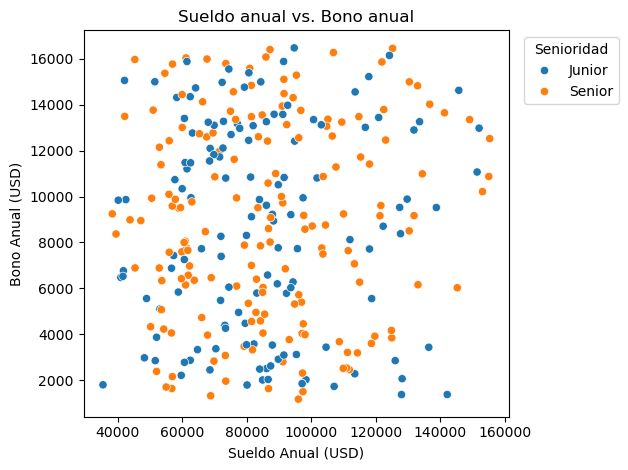

In [ ]:
# Dispersión salario anual vs bono anual
# asignamos a variable para poder utilizar en otros gráficos
ax = sns.scatterplot(data=df_salarios_pais,x='sueldo_anual_dolares', y='bono_anual_dolares',hue='senioridad')
# adornos
plt.legend(title="Senioridad", bbox_to_anchor=(1.02,1), loc='upper left')
plt.title('Sueldo anual vs. Bono anual')
plt.xlabel('Sueldo Anual (USD)')
plt.ylabel('Bono Anual (USD)')
plt.tight_layout()
plt.show()

#le aplicamos hue senoridad para ver la distribucion en colores
#por senioridad los bonos no tienen relacion con los sueldos

## 1️⃣5️⃣ Pregunta  
**¿Qué porcentaje de empleados lleva más de 5 años en la empresa?**

### ¿Por qué importa?  
- Mide la **retención de talento** y la estabilidad de la plantilla.  
- Un porcentaje alto indica lealtad y experiencia acumulada; uno bajo puede señalar rotación elevada.  
- Informa iniciativas de engagement y programas de reconocimiento para empleados veteranos.

### Pista  
Aplica una condición `df['anos_en_la_empresa'] > 5`, usa `.mean()` para obtener la proporción y multiplícalo por 100.

In [ ]:
# Porcentaje de empleados con más de 5 años en la empresa
empleados = df_salarios_pais[df_salarios_pais['anos_en_la_empresa'] > 5].value_counts('anos_en_la_empresa',normalize=True).mean()*100
print(f'Porcentaje de empleados en la región con más de 5 años en la empresa: {empleados}%')

#uso value_counts para contar las filas que cumplen la condición

Porcentaje de empleados en la región con más de 5 años en la empresa: 12.5%


## 1️⃣6️⃣ Pregunta  
**¿Qué país presenta el bono anual promedio más alto?**

### ¿Por qué importa?  
- Indica dónde la empresa invierte más en incentivos variables.  
- Ayuda a evaluar la competitividad de los planes de bonificación por región.  
- Puede revelar disparidades que requieran revisión de políticas de compensación.

### Pista  
Agrupa por `pais`, calcula la media de `bono_anual_dolares` y ordena de mayor a menor.

In [73]:
# País con el bono anual promedio más alto
pais = df_salarios_pais.groupby('pais')['bono_anual_dolares'].mean().sort_values(ascending=False).index[0]
print(f'País con Bono anual promedio más alto: {pais}')


País con Bono anual promedio más alto: México


## 1️⃣7️⃣ Pregunta  
**¿Cómo varía la distribución de la compensación total entre países?**  
*(Muestra un boxplot por país para comparar rangos y outliers).*

### ¿Por qué importa?  
- Visualiza diferencias salariales entre mercados.  
- Ayuda a identificar países con mayor dispersión o presencia de outliers altos/bajos.  
- Facilita decisiones sobre ajustes regionales y equidad interna.

### Pista  
Emplea `sns.boxplot()` con `x='pais'` y `y='compensacion_total'`; rota las etiquetas para que no se solapen.

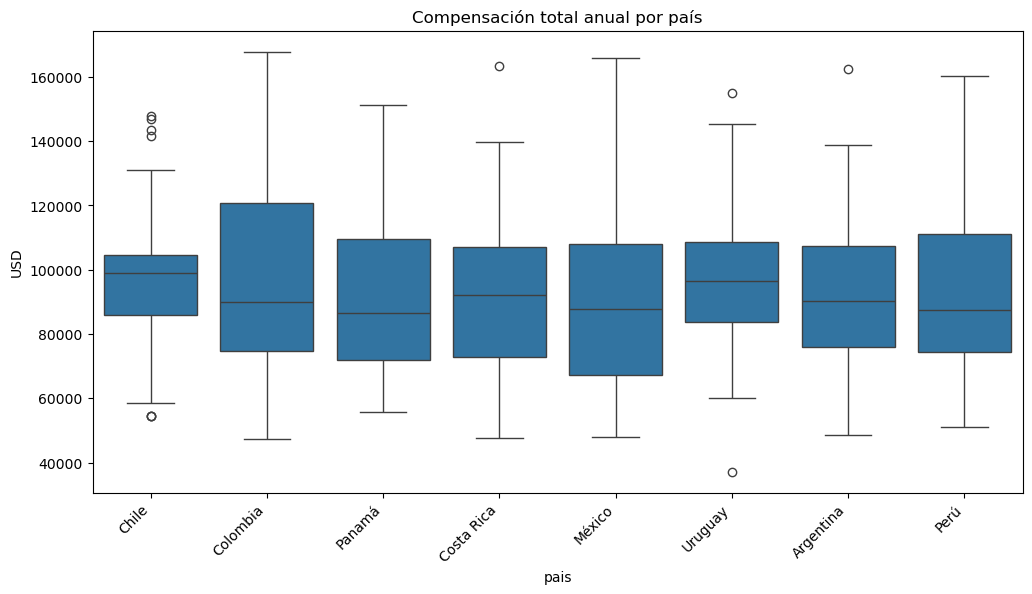

In [ ]:
# Boxplot de compensación total por país
# definir el canva (tamaño de la imagen)
plt.figure(figsize=(12,6))
# dibujar la gráfica
sns.boxplot(df_salarios_pais,x='pais', y='compensacion_total')
# adornos
plt.xticks(rotation=45, ha='right')
plt.title('Compensación total anual por país')
plt.ylabel('USD')
plt.show()

#interesante
# se podra hacer por pais y por senioridad en un solo gráfico?

## 1️⃣8️⃣ Pregunta  
**¿Cuál es el promedio de años en la empresa para cada cargo?**

### ¿Por qué importa?  
- Indica qué roles retienen talento por más tiempo.  
- Ayuda a identificar posiciones con alta rotación que podrían requerir planes de carrera o incentivos adicionales.  
- Ofrece información para comparar madurez y profundidad de experiencia entre áreas.

### Pista  
Agrupa por `cargo`, aplica `mean()` sobre `anos_en_la_empresa` y ordena descendente para ver los cargos con mayor antigüedad media.

In [87]:
# Promedio de años en la empresa por cargo
print('Promedio de años en la empresa por cargo')
df_salarios_pais.groupby('cargo')['anos_en_la_empresa'].mean('anos_en_la_empresa')

Promedio de años en la empresa por cargo


cargo
AI Software Engineer        6.52
Data Analyst                6.62
Data Engineer               6.50
Data Scientist              7.00
Machine Learning Engineer   6.50
Product Owner               7.79
Project Manager             5.16
Python Developer            6.67
Software Engineer           5.18
Name: anos_en_la_empresa, dtype: float64

## 1️⃣9️⃣ Pregunta  
**¿Cuál es la mediana del ingreso per cápita entre los países presentes en el dataset?**

### ¿Por qué importa?  
- Brinda un punto de referencia de **poder adquisitivo** promedio para las regiones donde opera la empresa.  
- Facilita comparar la compensación interna con los niveles de ingreso del país, aportando contexto sobre competitividad salarial local.  
- La mediana es robusta frente a valores extremos y refleja mejor el ingreso “típico” que el promedio en economías dispares.

### Pista  
Basta con aplicar `.median()` a la columna `ingreso_per_capita`.

In [89]:
# Mediana del ingreso per cápita de los países
print(f'Mediana de ingreso per capita por país')
df_salarios_pais.groupby('pais')['ingreso_per_capita'].median()

Mediana de ingreso per capita por país


pais
Argentina    14120.00
Chile        16580.00
Colombia      6611.00
Costa Rica   14319.00
México       11190.00
Panamá       16995.00
Perú          7900.00
Uruguay      20300.00
Name: ingreso_per_capita, dtype: float64

## 2️⃣0️⃣ Pregunta  
**¿Cómo se distribuyen los bonos anuales (USD) según el nivel de senioridad?**  
*(Representa la comparación con un violinplot).*

### ¿Por qué importa?  
- Muestra no solo la mediana y el rango, sino la **densidad completa** de los bonos para Juniors y Seniors.  
- Facilita detectar si los rangos de bonos se solapan o si los Seniors reciben incentivos notablemente mayores.  
- Ayuda a evaluar la equidad y efectividad del esquema de bonificación por experiencia.

### Pista  
Usa `sns.violinplot()` con `x='senioridad'` y `y='bono_anual_dolares'`.

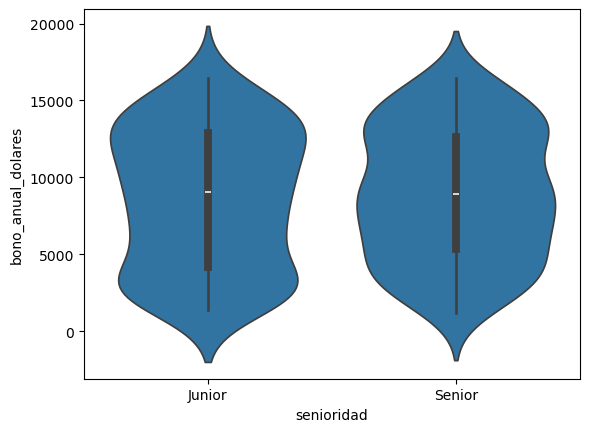

In [91]:
# Violinplot de bonos anuales por senioridad
sns.violinplot(df_salarios_pais, x='senioridad', y='bono_anual_dolares')
#adornos
plt.title='Distribución de Bono Anual según Senioridad'
plt.xlabel='Senioridad'
plt.ylabel='Bono anual'

## 🎉 ¡Felicidades!

Has completado el proyecto integral de **Análisis de Datos con Python**.  
Pasaste por todo el ciclo:

1. **Preparar el entorno**  
2. **Limpiar y transformar datos**  
3. **Explorar con visualizaciones**  
4. **Responder preguntas de negocio reales**

Cada notebook, gráfico y métrica que generaste demuestra tu capacidad para convertir datos en información valiosa. ¡Sigue practicando, comparte tus hallazgos con la comunidad PyData Panamá y recuerda que el siguiente insight puede cambiar una decisión clave!

🚀 **Buen trabajo, Data Analyst**. 